# Load previously cleaned and merged properties (comps)

The file being imported below was constructed in the last seven exploratory notebooks (1.0 to 1.6). These data have been cleaned and merged so we can start the exploratory data analysis.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import Table, save_pickle

In [3]:
plt.style.use('seaborn-poster')

In [4]:
comps_fn = ROOT_DIR / 'data/interim/2016/comps.pickle'
assert comps_fn.exists()

with open(comps_fn, 'rb') as f:
    comps = pickle.load(f)

In [5]:
comps.shape

(957686, 81)

In [6]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957686 entries, 0 to 957685
Data columns (total 81 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   acct                                            957686 non-null  uint64        
 1   dscr                                            957686 non-null  category      
 2   date_erected                                    957686 non-null  uint16        
 3   yr_remodel                                      86406 non-null   float64       
 4   im_sq_ft                                        957683 non-null  float64       
 5   act_ar                                          957686 non-null  uint16        
 6   heat_ar                                         957682 non-null  float64       
 7   gross_ar                                        957686 non-null  uint16        
 8   eff_ar                            

In [7]:
comps.sample(10)

,acct,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
899476,1295140040011,Good,2008,NaN,2806.0,3501,2806.0,3501,2941.0,370.0,...,0.0,0.0,155.0,Average,NaN,Brick / Veneer,Slab,B,Central Heat/AC,Average
300178,950720000012,Average,1963,NaN,1771.0,2320,1771.0,2320,1880.0,204.0,...,70.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
707640,1195510030009,Average,1998,NaN,2040.0,2551,2040.0,2551,2230.0,260.0,...,0.0,91.0,0.0,Good,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
913857,1301260020017,Good,2009,NaN,1688.0,2327,1688.0,2327,1923.0,210.0,...,0.0,90.0,65.0,Average,NaN,Brick / Veneer,Slab,B,Central Heat/AC,Average
476999,1111720000019,Good,1979,NaN,2618.0,3110,2618.0,3110,2614.0,314.0,...,700.0,100.0,0.0,Very Good,NaN,Brick / Masonry,Slab,B+,Central Heat/AC,Good
890693,1284910010002,Average,2010,NaN,2295.0,2756,2295.0,2756,2328.0,328.0,...,0.0,45.0,36.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
155175,752020150003,Good,1955,NaN,4235.0,5557,4235.0,5557,4534.0,476.0,...,0.0,28.0,0.0,Very Good,Partial,Brick / Veneer,Slab,B+,Central Heat/AC,Good
682860,1186750020026,Average,1996,NaN,2135.0,2565,2135.0,2565,2297.0,226.0,...,0.0,0.0,30.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
373673,1040230000024,Good,1972,NaN,2212.0,2740,2212.0,2740,2206.0,280.0,...,160.0,48.0,40.0,Average,NaN,Brick / Masonry,Slab,B-,Central Heat/AC,Average
484964,1117330000015,Good,1991,NaN,5489.0,7350,3807.0,7350,4967.0,837.0,...,0.0,0.0,65.0,Good,NaN,Brick / Veneer,Slab,B+,Central Heat/AC,Average


## Drop account numbers
The account numbers are kept as a reference to the raw data, but should not be used in the EDA. Since they are unique, let's use them as index in the comps dataframe.

In [8]:
comps['acct'].is_unique

True

In [9]:
comps.set_index('acct', inplace=True)

In [10]:
comps.sample(10)

,dscr,date_erected,yr_remodel,im_sq_ft,act_ar,heat_ar,gross_ar,eff_ar,perimeter,fireplace_masonry_firebrick,...,one_story_mas_pri,open_frame_porch_pri,open_mas_porch_pri,cond_desir_util,cost_and_design,exterior_wall,foundation_type,grade_adjustment,heating_ac,physical_condition
acct,,,,,,,,,,,,,,,,,,,,,
1188880040059,Average,1996,NaN,2019.0,2507,2019.0,2507,2204.0,252.0,0.0,...,0.0,0.0,26.0,Average,NaN,Brick / Veneer,Slab,C+,Central Heat/AC,Average
1010870000044,Good,1970,NaN,2538.0,2698,2538.0,2698,2469.0,300.0,1.0,...,144.0,105.0,0.0,Average,NaN,Brick / Masonry,Slab,B-,Central Heat/AC,Average
1131720000013,Average,1981,NaN,1164.0,1648,1164.0,1648,1348.0,172.0,0.0,...,0.0,0.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
422300000220,Low,1938,2001.0,1096.0,2016,1096.0,2016,1420.0,256.0,0.0,...,0.0,72.0,0.0,Average,Extensive,Frame / Concrete Blk,Crawl Space,D+,None,Good
1149480070051,Average,1981,NaN,1584.0,2062,1584.0,2062,1765.0,228.0,0.0,...,0.0,18.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average
961260000012,Good,1966,NaN,3267.0,4047,3267.0,4047,3390.0,276.0,1.0,...,250.0,28.0,0.0,Good,NaN,Brick / Veneer,Slab,B,Central Heat/AC,Good
802920000012,Average,1952,2001.0,1830.0,2337,1830.0,2337,1996.0,188.0,0.0,...,0.0,0.0,88.0,Fair,Partial,Brick / Veneer,Slab,C,None,Average
1205960010074,Good,2001,NaN,2966.0,3768,2966.0,3768,3243.0,278.0,0.0,...,0.0,0.0,188.0,Average,NaN,Brick / Veneer,Slab,B+,Central Heat/AC,Average
131610000025,Average,1982,NaN,1900.0,2880,1900.0,2880,2303.0,276.0,1.0,...,0.0,120.0,0.0,Average,NaN,Brick / Veneer,Slab,C,Central Heat/AC,Average


# Build target column
The purpose of this work is to find if a given property was fairly appraised when compared with with similar properties.

For this we could find the distribution of similar properties total appraised value (`tot_appr_val`) and locate where our target distribution falls. However, since there is a wide range of property values given their location (neighborhood), physical condition, renovation, and other factors, it might be best to focus on the year-to-year percent change in property value:

`yy_pct_change` = (`tot_appr_val` - `prior_tot_appr_val`) / `prior_tot_appr_val`

## Drop NaNs in value colums

In [11]:
cond0 = comps['prior_tot_appr_val'].isna()
cond1 = comps['tot_appr_val'].isna()

In [12]:
print(f'Percent of prior_tot_appr_val missing values: {cond0.sum() / cond0.shape[0]}')
print(f'Percent of tot_appr_val missing values: {cond1.sum() / cond1.shape[0]}')

Percent of prior_tot_appr_val missing values: 0.0017396098512456066
Percent of tot_appr_val missing values: 4.176734336724146e-06


In [13]:
comps = comps.loc[~cond0 & ~cond1, :]

## Drop samples where prior_tot_appr_val is zero

In [14]:
cond0 = comps['prior_tot_appr_val'] == 0

cond0.sum()

30

In [15]:
comps = comps.loc[~cond0, :]

## Build year-to-year percent change value

In [16]:
comps['yy_pct_change'] = (comps['tot_appr_val'] - comps['prior_tot_appr_val']) / comps['prior_tot_appr_val']

In [17]:
comps['yy_pct_change'].describe()

count    955988.000000
mean          0.165985
std           8.581099
min          -0.870447
25%           0.030658
50%           0.099989
75%           0.099999
max        7151.941176
Name: yy_pct_change, dtype: float64

## Remove exceedingly large value changes

There are valid reasons for a property value appreciation from year-to-year to be multiples of the initial value, for example, when a new house is constructed on an existing lot, the previous year value will be the value of the land alone, and the current year value will be the value of the land plus the value of the improvement (built house).

Similarly, when the existing house in the prior year is a tear-down, we can expect the value of the property to increase significantly if the owner has removed the old house and built a new one on its place. This is fairly common on neighborhoods with new constructions restrictions, like The Heights. 

Also, we can expect a large value increase if there has been a major remodeling that either increased the number of rooms of baths (fixtures), common on fixer-uppers, but this work generally increases the value of a property by a fraction, and not whole multipliers.

I'm primarily concerned with finding the comparable properties to my house, that was already there in 2015 (no new construction), and had no remodeling done (no fixtures change). For this, I'll filter out all samples outside the [-1, 1] appreciation percent range.

### Remove new constructions and recent remodels

In [18]:
comps['lastest_const_year'] = comps['yr_remodel'].fillna(comps['date_erected'])

In [19]:
cond0 = (comps['lastest_const_year'] >= 2015)

In [20]:
print(f'Number of new constructions or newly remodeled properties: {cond0.sum()}')
print(f'Percent of total: {cond0.sum() / comps.shape[0]:.2f} %')

Number of new constructions or newly remodeled properties: 10020
Percent of total: 0.01 %


In [21]:
comps = comps.loc[~cond0, :]

### Remove real (bad data) outliers
Large value changes that where not captured by the new construction and remodel filter above, might be a result of problems with the data.

In [22]:
cond0 = comps['yy_pct_change'].between(-1,1)

In [23]:
outliers = comps.loc[~cond0, ['yy_pct_change', 'tot_appr_val', 'prior_tot_appr_val', 'lastest_const_year']]

In [24]:
outliers.shape

(3036, 4)

In [25]:
outliers.describe()

,yy_pct_change,tot_appr_val,prior_tot_appr_val,lastest_const_year
count,3036.000000,3.036000e+03,3.036000e+03,3036.000000
mean,2.107496,3.272255e+05,1.225868e+05,1999.955534
std,1.900489,3.275134e+05,1.367662e+05,26.070637
min,1.000456,7.900000e+03,1.000000e+03,1870.000000
25%,1.183824,1.440250e+05,3.918075e+04,2004.000000
50%,1.484603,2.498880e+05,8.927750e+04,2014.000000
75%,2.209001,4.104905e+05,1.545838e+05,2014.000000
max,45.160430,4.122500e+06,1.651458e+06,2014.000000


In [26]:
outliers.head()

,yy_pct_change,tot_appr_val,prior_tot_appr_val,lastest_const_year
acct,,,,
31640000004,1.200552,149072.0,67743.0,1920.0
30490000007,1.581602,87000.0,33700.0,1938.0
32170000026,1.142638,208198.0,97169.0,2014.0
32600000015,1.024324,277055.0,136863.0,2013.0
40250000004,1.257994,28952.0,12822.0,1945.0


for example, from the five outliers examples above, the older houses (latest_const_year 1920, 1938, 1945) are probably remodels or new constructions from tear-downs that didn't reflect the constructions updates in this database.

The more recent properties (2014, 2013) apparently didn't realize their full value until later, a sort of edge effect depending on when was the construction finished during the year.

In [27]:
print(f'Number of outliers to be removed: {outliers.shape[0]}')
print(f'Percent of outliers to be removed: {outliers.shape[0] / comps.shape[0]:.4f} %')

Number of outliers to be removed: 3036
Percent of outliers to be removed: 0.0032 %


In [28]:
comps = comps.loc[cond0, :]

## Examine target after outliers removal

In [29]:
comps['yy_pct_change'].describe()

count    942932.000000
mean          0.077794
std           0.085153
min          -0.870447
25%           0.029525
50%           0.099987
75%           0.099999
max           1.000000
Name: yy_pct_change, dtype: float64

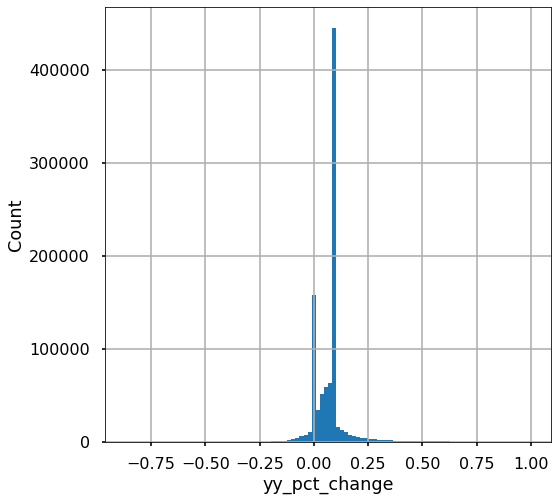

In [43]:
_ = plt.figure(figsize=(8,8))
_ = comps['yy_pct_change'].hist(bins=100)
_ = plt.xlabel('yy_pct_change')
_ = plt.ylabel('Count')

This is interesting. There is a spike in the 10% value increase mark. This is possibly related to [Capped Appraisal Values](https://hcad.org/hcad-resources/hcad-residential-property/hcad-capped-appraisal-values/), where the appraisal district will cap the value of an existing property if the current year appraised value is more than 10% of last year's. Also, the property has to be homestead exempt for the current and prior year to be eligible for this benefit.

We can see in the histogram that about 425000 properties qualified for this capping rule. Neat!

There is a lesser spike near 0 % value increase, but its origin is less clear.

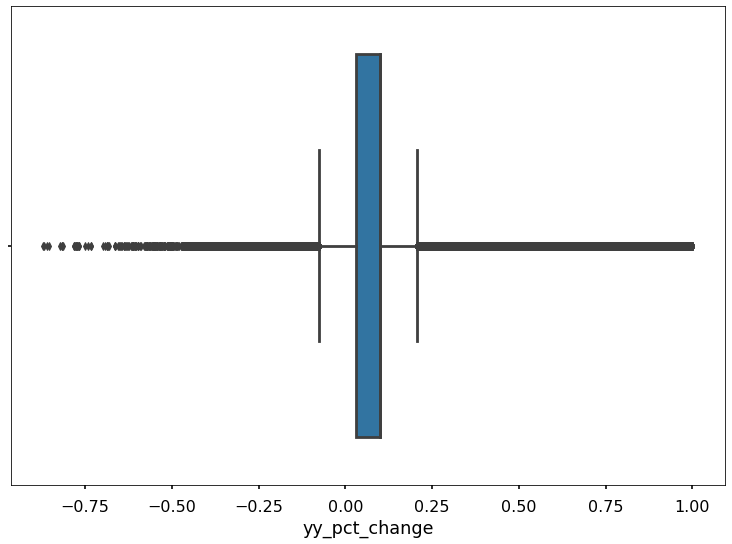

In [45]:
_ = sns.boxplot(x=comps['yy_pct_change'])

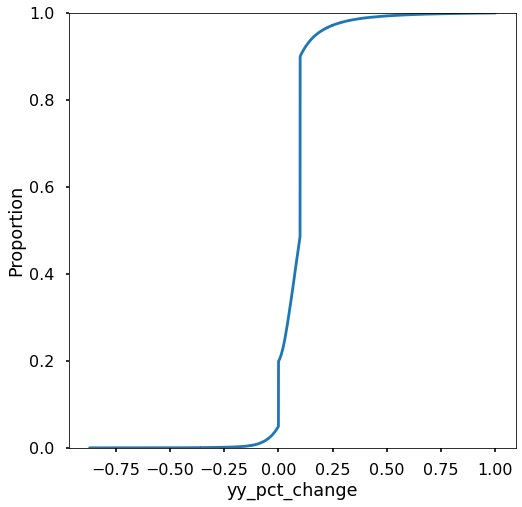

In [46]:
_ = plt.figure(figsize=(8, 8))
_ = sns.ecdfplot(x='yy_pct_change', data=comps)

In [67]:
comps.drop('tot_appr_val', axis=1, inplace=True)

# Preliminary report

Since there are 80 features in this dataset, it is best to explore them using an automated tool like [Sweetviz](https://github.com/fbdesignpro/sweetviz). This will take care of building the histograms and summary statistics for each feature, and also will provide an association plot between all the variables. I will select the variables from this plot to further investigate interesting associations.

## Reset dtypes to work with Sweetviz
Running `sweetviz` with the `comps` data "as is" was throwing a `TypeError` associated with the categorical columns, so here I change their type to `object`.

In [68]:
for col in comps.columns:
    if str(comps[col].dtype) == 'category':
        comps[col] = comps[col].astype('object')

In [69]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 942932 entries, 22070000001 to 1955020050280
Data columns (total 81 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   dscr                                            942932 non-null  object        
 1   date_erected                                    942932 non-null  uint16        
 2   yr_remodel                                      83740 non-null   float64       
 3   im_sq_ft                                        942929 non-null  float64       
 4   act_ar                                          942932 non-null  uint16        
 5   heat_ar                                         942928 non-null  float64       
 6   gross_ar                                        942932 non-null  uint16        
 7   eff_ar                                          942931 non-null  float64       
 8   perimeter       

## Run Sweetviz

In [70]:
import sweetviz as sv

In [71]:
# This takes a long time to run (37 min), change flag to True if need to re-run
if True:
    my_report = sv.analyze(comps, target_feat='yy_pct_change')
    my_report.show_html(filepath='SWEETVIZ_REPORT_yy_pct_change.html')

:FEATURES DONE:                    |█████████████████████| [100%]   15:45  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   20:05  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT_yy_pct_change.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


The cell above creates a file (notebooks/01_Exploratory/SWEETVIZ_REPORT.html) with the resulting plots.

# Features exploration
Let's start by review the association plot in the sweetviz report.

![Sweetviz all variables association](figures/sv_all_variables_association.png)

Impressive!

There is a strong association in most variables in the top left quadrant. I'm particularly interested in exploring the associations with the total appraise value (`tot_appr_val`) so let's look at its individual association table.

![total apprasied value association tables](figures/tot_appr_val_associations_tables.png)

Now let's select the numerical and categorical features with strong association (> 0.59) to our target variable and examine these in detail.

In [ ]:
num_features = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'land_val',
    'eff_ar',
    'bld_ar',
    'heat_ar',
    'im_sq_ft',
    'gross_ar',
    'act_ar',
    'fixtures_total',
    'perimeter',
    'room_full_bath',
]

cat_features = [
    'grade_adjustment',
    'market_area_1_dscr',
    'market_area_2_dscr',
    'dscr',
]

# Selected features analysis

## Total appraised value: tot_appr_val
Let's begin with a description of our target variable: total appraised value.

In [ ]:
from src.visualization.visualize import plot_ecdf, plot_counts, plot_hist

plt.style.use('ggplot')

Check for null values

In [ ]:
comps['tot_appr_val'][comps['tot_appr_val'].isna()]

let's remove these from the comps dataframe

In [ ]:
comps.dropna(axis=0, how='any', subset=['tot_appr_val'], inplace=True)

Now let's build the plots

In [ ]:
col ='tot_appr_val'
series = comps[col]

In [ ]:
series.describe()

In [ ]:
plot_hist(series, col)

The high valued properties are masking the distribution of the lower valued properties in this histogram. Let's remake this figure with only properties valued less than $500k

In [ ]:
plot_hist(series[series < 500000], col + ': Less than $500k')

So the most common value is around $150k with a right-skewed distribution.

In [ ]:
plot_ecdf(series, col)

More than 90% of the properties are valued less than ~$400K

## Check for features interdependence
I'd like to drop highly interdependent features. Since there are so many to check, I'll group, compare, and select them first by major categories (value, area, fixtures), and then repeat the process for the final feature selection. 

### Value metrics

In [ ]:
values = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'land_val',
]

In [ ]:
_ = sns.pairplot(comps.loc[:, values])

In [ ]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(comps.loc[:, values].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title('Pearson correlation heatmap: Values')

The total appraised value (`tot_appr_val`) is highly correlated to the prior year value (`prior_tot_appr_val`). It is reasonable to assume that both of these should include the land value (total_value = land_value + building_value), and since the current land value (`land_val`) and prior land value (`prior_land_val`) are so highly correlated we can do with just one of these. I'll select the prior land value as it should be available for all properties.

## Area metric

These features were encountered first on the notebook: [notebooks/01_Exploratory/1.0-rp-hcad-data-view-building-res](1.0-rp-hcad-data-view-building-res.ipynb).

Here is a brief description:

1. im_sq_ft: Improvement area.
2. act_ar: Actual area. For residential properties this is the base area of the house.
3. heat_ar: Living Area or Building sqft of a residential building. 
4. gross_ar: Usually equal to Actual area, except in 1+1/2 story houses. Commercial properties do not use Gross Area.
5. eff_ar: Effective area. This is used in determining the market value of the improvements, but there is no clear definition in the HCAD website.

In [ ]:
areas = [
    'tot_appr_val',
    'eff_ar',
    'bld_ar',
    'heat_ar',
    'im_sq_ft',
    'gross_ar',
    'act_ar',
    'perimeter'
]

In [ ]:
_ = sns.pairplot(comps.loc[:, areas])

In [ ]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(comps.loc[:, areas].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Areas')

Since all the areas and perimeter are highly correlated between them, we can select one to continue our analysis. I think the most accessible area is the improvement area (`im_sq_ft`) since it represents the sum of all the areas of the buildings in the property. This value should be relatively easy to obtain for a homeowner. 

## Fixtures

In [ ]:
fixtures = [
    'tot_appr_val',
    'fixtures_total',
    'room_full_bath',
]

In [ ]:
_ = sns.pairplot(comps.loc[:, fixtures])

In [ ]:
plt.figure(figsize=(14,12))
_ = sns.heatmap(comps.loc[:, fixtures].corr(), linewidths=0.1, cmap='YlGnBu', annot=True)
_ = plt.title(f'Pearson correlation heatmap: Fixtures')

It looks like we can treat the total number of bathrooms as a categorical variable. Let's look at appraised value boxplots split by `room_full_bath`.

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='room_full_bath', y='tot_appr_val', data=comps)

In [ ]:
comps['room_full_bath'].value_counts()

Not counting properties with 10 and 11 full bathrooms (low sample size), we can see that having more full baths start to positively associate to appraised value past the 4th bathroom. It is possible that there are lurking factor here, e.g. bigger houses are in more expensive neighborhoods and have more full bathrooms, so we should check for this below.

Also, the sum of all fixtures (`fixtures_total`) should contain the `room_full_bath`, as the latter are fixtures. Let's keep this in mind while further refining our feature selection.

## Categorical features
Let's explore the relationship of each one of the categorical features with the total appraised value. As a reminder here are the definitions of the categories we are about to expore:

1) **Grade adjustment**: The grade is a factor that is intended to reflect an overall judgment of the quality of workmanship and materials evident in a dwelling ([HCAD](https://hcad.org/hcad-resources/hcad-appraisal-codes/hcad-building-grade-adjustment/)). The scale of factors runs from E- (lowest), E, E+, D-, D, D+, C-, C, C+, B-, B, B+, A-, A, A+, X-, X, X+ (highest).

2) **Market area 1 dscr**: Market areas are defined by the physical, economic, governmental and social forces that influence property values. The effects of these forces were used to identify, classify and stratify or delineate similarly situated properties into smaller, more comparable and manageable subsets for valuation purposes. Delineation can involve the physical drawing of neighborhood boundary lines on a map; it can also involve statistical separation or stratification based on attribute analysis. These homogeneous properties have been delineated into valuation neighborhoods for residential property or economic class for commercial property, but because there are discernible patterns of growth that characterize a neighborhood or market segment, analyst staff will annually evaluate the neighborhood boundaries or market segments to ensure homogeneity of property characteristics ([HCAD](https://hcad.org/assets/uploads/pdf/Reports/2017-2018_reappraisal_plan_amended_final_20180124.pdf))

There is no clear distinction between `market_area_1_dscr` and `market_area_2_dscr` and since they are correlated highly correlated among themselves (sweetviz association plot), I think it is safe to select just one for the analysis.

3) **dscr**: It's the property quality description. I think this should be highly associated with the grade adjustment. 

In [ ]:
cat_features = [
    'grade_adjustment',
    'market_area_1_dscr',
    'dscr',
]

### Grade adjustment

In [ ]:
order =  ['E-', 'E', 'E+', 'D-', 'D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+', 'X-', 'X', 'X+']

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='grade_adjustment', y='tot_appr_val', data=comps, order=order)

In [ ]:
comps['grade_adjustment'].value_counts()

The grade adjustment starts to significantly influence the appraised value after the B classification.

### market_area_1_dscr
Let's remove the areas with insufficient samples (<30).

In [ ]:
comps['market_area_1_dscr'].value_counts().tail(16)

In [ ]:
drop_areas = list(comps['market_area_1_dscr'].value_counts().tail(16).index)

In [ ]:
cond0 = ~comps['market_area_1_dscr'].isin(drop_areas)
comps = comps.loc[cond0, :]

Now let's build the order based on the median of the total appraised value.

In [ ]:
order = comps.groupby('market_area_1_dscr')['tot_appr_val'].quantile(0.5).sort_values().index

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
_ = sns.boxplot(x='market_area_1_dscr', y='tot_appr_val', data=comps, order=order)
_ = plt.xticks(rotation=90)

Let's zoom in the figure above in the region of houses valued less than $1.2M.

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
_ = sns.boxplot(x='market_area_1_dscr', y='tot_appr_val', data=comps, order=order)
_ = plt.xticks(rotation=90)
_ = plt.ylim((-50000, 1200000))

Location, location, location!

The median appraised value moderately increases from the Former North Forest ISD market area to ISD-29 - Pearland, and then it increases tremendously up to 1F River Oaks (from which we only catch its bottom whisker on this plot).

### dscr
This is the current property quality description. It is an ordered categorical variable that can take values: 'Excellent', 'Superior', 'Good', 'Average', 'Low', 'Very Low', and 'Poor'.

In [ ]:
comps['dscr'].value_counts()

Let's drop the properties classified as poor since there are only 13 units.

In [ ]:
cond0 = ~(comps['dscr'] == 'Poor')
comps = comps.loc[cond0, :]

In [ ]:
order = ['Superior', 'Excellent', 'Good', 'Average', 'Low', 'Very Low']

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='dscr', y='tot_appr_val', data=comps, order=order)

Zooming in to properties valued less than $3M

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='dscr', y='tot_appr_val', data=comps, order=order)
_ = plt.ylim((-50000, 3000000))

`dscr` really seems to influence the appraised value.

Now let's compare `dscr` with `grade_adjustment` as it is possible that they are highly correlated. The idea is to group the properties by `dscr` and then draw a count plot of the `grade_adjustment` for each quality description.

In [ ]:
for group, df in comps.groupby('dscr'):
    ga = df['grade_adjustment']
    
    fig, ax = plt.subplots(figsize=(16,8))
    sns.countplot(x=ga)
    _ = plt.xlabel(group)
    _ = plt.ylabel('Count')

It looks like the quality descriptions have the following correspondence:

1) Very Low: E-, E, E+

2) Low: D-, D, D+

3) Average: C-, C, C+

4) Good: B-, B, B+

5) Excellent: A-, A, A+

6) Superior: X-, X, X+

with a few outliers. Let's keep both features for the time being.

# Check independence of selected features

## Is the total number of bathrooms a function of the house size?

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.boxplot(x='room_full_bath', y='im_sq_ft', data=comps)

It looks like the bigger the house the more full bathrooms it has. Also, the variance of the distribution increases with the number of baths, possibly because the more baths the lower the sample size in that category.

I think there is enough variability in this plot to keep both features.

## Re-run sweetviz on selected features

In [ ]:
keep = [
    'tot_appr_val',
    'prior_tot_appr_val',
    'prior_land_val',
    'im_sq_ft',
    'fixtures_total',
    'room_full_bath',
    'grade_adjustment',
    'market_area_1_dscr',
    'dscr',
    'date_erected', # We will need this down the road
    'yr_remodel', # We will need this down the road
]

In [ ]:
features = comps.loc[:, keep]

In [ ]:
if False:
    my_report = sv.analyze(features, target_feat='tot_appr_val')
    my_report.show_html(filepath='SWEETVIZ_REPORT_features.html')

Now the dependency between the selected features is clear in the sweetviz association plot:

![Sweetviz selected features only association](figures/sv_features_association.png)

There is a lot of independence between these features, so we need to approach the modeling step one feature at a time, to understand the contribution of each to the prediction.

Next, we should group the properties based on these features to find the distribution of properties where my target house belongs, and then assess the probability of getting my appraised value or more under this distribution.

# Export features

In [ ]:
save_fn = ROOT_DIR / 'data/interim/2016/features.pickle'
save_pickle(features, save_fn)

## Build linear model

In [47]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
X = comps['prior_tot_appr_val']
y = comps['yy_pct_change']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model = linear_model.LinearRegression()

In [51]:
X_train = X_train.to_numpy().reshape(-1, 1)
model.fit(X_train, y_train)

LinearRegression()

In [52]:
model.score(X_train, y_train)

0.0072398103226701815

In [53]:
X_test = X_test.to_numpy().reshape(-1, 1)
y_pred = model.predict(X_test)

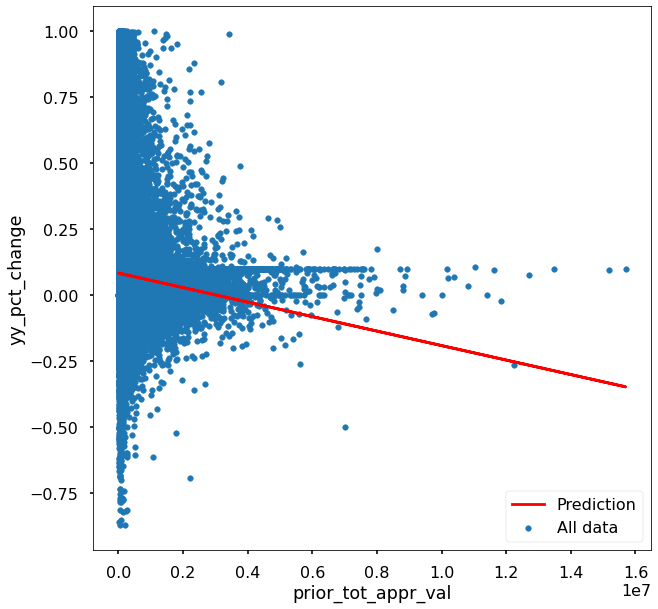

In [58]:
x = X.to_numpy().reshape(-1, 1)

plt.figure(figsize=(10, 10))
_ = plt.scatter(x, y, marker='.', label='All data')
_ = plt.plot(x, model.predict(x), color='red', label='Prediction')
_ = plt.xlabel('prior_tot_appr_val')
_ = plt.ylabel('yy_pct_change')

_ = plt.legend(loc='lower right')

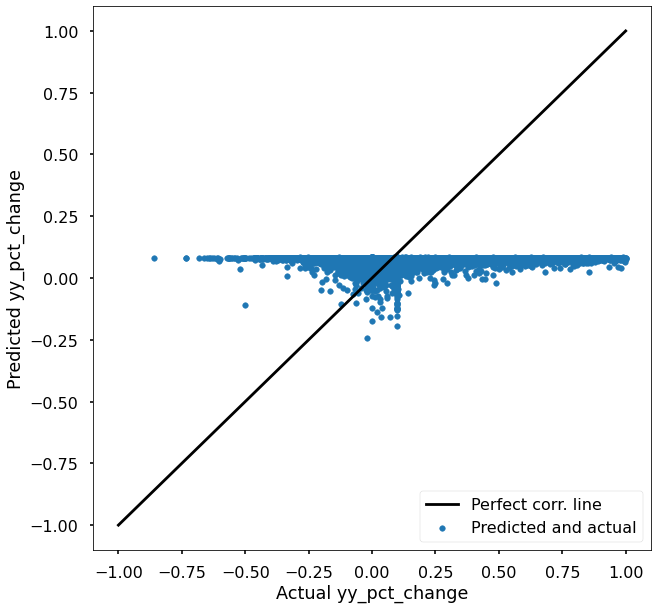

In [60]:
plt.figure(figsize=(10, 10))
_ = plt.scatter(y_test, y_pred, marker='.', label='Predicted and actual')
_ = plt.plot([-1, 1], [-1, 1], color='black', label='Perfect corr. line')
_ = plt.xlabel('Actual yy_pct_change')
_ = plt.ylabel('Predicted yy_pct_change')

_ = plt.legend(loc='lower right')

In [56]:
mean_squared_error(y_test, y_pred)

0.007171698742160537

In [64]:
x = model.predict(X_train)
y = y_train - x

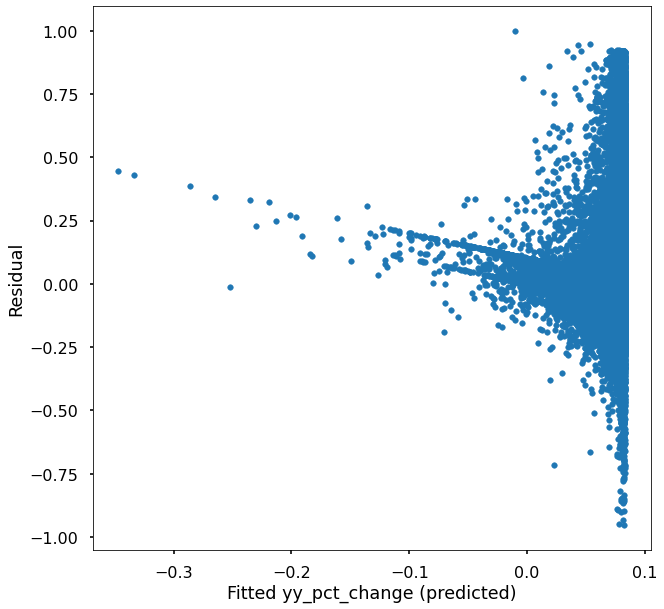

In [65]:
plt.figure(figsize=(10, 10))
_ = plt.scatter(x, y, marker='.', label='Residuals')
_ = plt.xlabel('Fitted yy_pct_change (predicted)')
_ = plt.ylabel('Residual')

But since there is a wide range of appraised values, it might be best to focus on the percent change difference from last to this year, so we can observe if there is a pattern using all the samples.